In [2]:
from build import betti_matching as bm

import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import colormaps

from utils.functions import *

### Computing *persistence barcodes* of digital images

Load an image whose persistence barcode you want to compute. It should be represented in form of n-dimensional numpy array.

For demonstration purposes, we will load a 2D-segmentation.

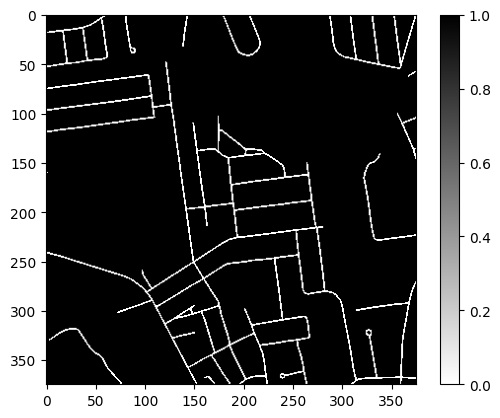

In [3]:
path_data = "data/roads"
label = cv2.imread(path_data + "/labels/label_0111.png")[:,:,0]
label = (255-label)/255

img = plt.imshow(label, cmap='binary')
cbar = plt.colorbar(img)
plt.show()

You can compute the barcode of an image by applying the `compute_barcode` function of the 'betti_matching' module.

Use the following command to see its documentation:

In [4]:
bm.compute_barcode?

Docstring:
compute_barcode(*args, **kwargs)
Overloaded function.

1. compute_barcode(input: numpy.ndarray) -> BarcodeResult

2. compute_barcode(inputs: list[numpy.ndarray]) -> list[BarcodeResult]
Type:      builtin_function_or_method

In [5]:
barcode_label = bm.compute_barcode(label)

The output contains two lists of lists. The first one contains the coordinates of birth-voxels of the respective dimensions and the second one the coordinates of corresponding death-voxels.

Note that we do not ouput the essential interval for convencience. If you want to use the essential intervals as well, you can compute the lexicographically minimal voxel (with respect to its coordinates) with minimum value, which will be the birth-voxel for the essential interval.

In [6]:

print(len(barcode_label.birth_coordinates[0]))
print(len(barcode_label.death_coordinates[0]))
print(len(barcode_label.birth_coordinates[1]))
print(len(barcode_label.death_coordinates[1]))

11
11
22
22


The label has 12 intervals in dimension 0 and 22 in dimension 1.

We output the voxel coordinates, so that they can be used to define the *Betti matching loss* using the values of the original arrays. This allows for backpropagation during training of neural networks.

You can obtain the actual persistence intervals by replacing a pair of voxels $(\operatorname{birth},\operatorname{death})$ of some image $I$ with its corresponding interval $[I[\operatorname{birth}],I[\operatorname{death}])$.

In [7]:
birth = barcode_label.birth_coordinates[0][0]
death = barcode_label.death_coordinates[0][0]
print(birth)
print(death)
print("[",label[birth[0],birth[1]],label[death[0],death[1]],")")

[ 0 80]
[ 0 79]
[ 0.0 1.0 )


### Computing *Betti matching*

Load two images that you want to compare using *Betti Matching*. They should be represented in form of n-dimensional numpy arrays.

For demonstration purposes, we will load a 2D-segmentation and apply the distance transform to it.

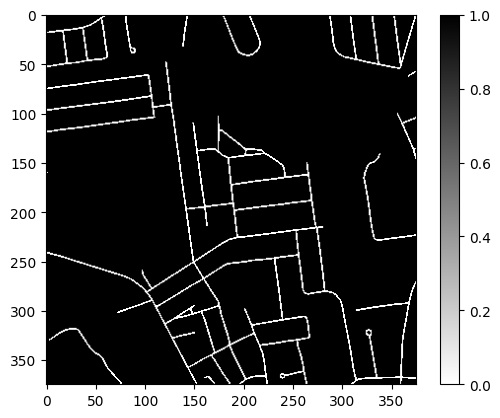

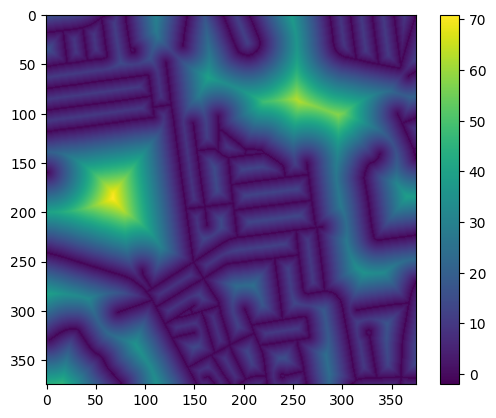

In [8]:
path_data = "data/roads"
label = cv2.imread(path_data + "/labels/label_0111.png")[:,:,0]
label = (255-label)/255

img = plt.imshow(label, cmap='binary')
cbar = plt.colorbar(img)
plt.show()

dt = distance_transform(label)

img = plt.imshow(dt)
cbar = plt.colorbar(img)

You can compute the *Betti Matching* of two images just by applying the `compute_matching` function of the `betti_matching` module.

Use the following command to see its documentation:

In [9]:
bm.compute_matching?

Docstring:
compute_matching(*args, **kwargs)
Overloaded function.

1. compute_matching(input1: numpy.ndarray, input2: numpy.ndarray, include_input1_unmatched_pairs: bool = True, include_input2_unmatched_pairs: bool = True) -> BettiMatchingResult


        compute_matching(input1, input2, include_input1_unmatched_pairs=True, include_input2_unmatched_pairs=True)

        Compute the Betti matching between two input volumes.

        Parameters
        ----------
        input1 : numpy.ndarray
            The first input volume (the "prediction" in the machine
            learning context).
        input2 : numpy.ndarray
            The second input volume (the "target" in the machine
            learning context).
        include_input1_unmatched_pairs : bool, optional
            Whether to include the unmatched pairs in the input1 volume
            in the result. Default is True.
        include_input2_unmatched_pairs : bool, optional
            Whether to include the unmatched pairs

In [10]:
result = bm.compute_matching(dt, label)

The output contains 8 lists of lists containing the matched and unmatched birth-voxels and death-voxels of input1 and input2. Furthermore, it contains three lists that contain the number of matched intervals, number of unmatched intervals of input1 and number of unmatched intervals in input2 in the respective dimensions.

Note that we do not ouput the essential interval for convencience, which would naturally be matched by *Betti matching*. 

If you want to use the essential intervals as well, you can compute the lexicographically minimal voxel (with respect to its coordinates) with minimum value, which will be the birth-voxel for the essential interval.

In [11]:
print(result.num_matched)
print(len(result.input1_matched_birth_coordinates[0]))
print(len(result.input1_matched_death_coordinates[0]))
print(len(result.input2_matched_birth_coordinates[0]))
print(len(result.input2_matched_death_coordinates[0]))

print(len(result.input1_matched_birth_coordinates[1]))
print(len(result.input1_matched_death_coordinates[1]))
print(len(result.input2_matched_birth_coordinates[1]))
print(len(result.input2_matched_death_coordinates[1]))

print()
print(result.num_unmatched_input1)

print(len(result.input1_unmatched_birth_coordinates[0]))
print(len(result.input1_unmatched_death_coordinates[0]))
print(len(result.input1_unmatched_birth_coordinates[1]))
print(len(result.input1_unmatched_death_coordinates[1]))

print()
print(result.num_unmatched_input2)
print(len(result.input2_unmatched_birth_coordinates[0]))
print(len(result.input2_unmatched_death_coordinates[0]))
print(len(result.input2_unmatched_birth_coordinates[1]))
print(len(result.input2_unmatched_death_coordinates[1]))

[11 22]
11
11
11
11
22
22
22
22

[ 68 278]
68
68
278
278

[0 0]
0
0
0
0


There are 11 matched intervals in dimension 0 matched intervals in dimension 1. The distance-transform has 68 unmatched intervals in dimension 0 and 278 unmatched intervals in dimension 1, whereas the label has 0 unmatched intervals in dimension 0 and dimension 1.

We output the voxel coordinates, so that they can be used to define the *Betti matching loss* using the values of the original arrays. This allows for backpropagation during training of neural networks.

You can obtain the actual persistence intervals by replacing a pair of voxels $(\operatorname{birth},\operatorname{death})$ of some image $I$ with its corresponding interval $[I[\operatorname{birth}],I[\operatorname{death}])$.

In [13]:
birth_dt = result.input1_matched_birth_coordinates[0][0]
death_dt = result.input1_matched_death_coordinates[0][0]

birth_label = result.input2_matched_birth_coordinates[0][0]
death_label = result.input2_matched_death_coordinates[0][0]

print(birth_dt)
print(death_dt)
print("[",dt[birth_dt[0],birth_dt[1]],dt[death_dt[0],death_dt[1]],")")
print()
print(birth_label)
print(death_label)
print("[",label[birth_label[0],birth_label[1]],label[death_label[0],death_label[1]],")")

[33 85]
[ 0 71]
[ -1.4142135623730951 9.0 )

[ 0 80]
[ 0 79]
[ 0.0 1.0 )


The *Betti matching eror* in dimension $n$ can then be computed by

In [14]:
n = 0
error_matched = 2*sum((dt[*result.input1_matched_birth_coordinates[n].T]-label[*result.input2_matched_birth_coordinates[n].T])**2+(dt[*result.input1_matched_death_coordinates[n].T]-label[*result.input2_matched_death_coordinates[n].T])**2)
error_unmatched_dt = sum((dt[*result.input1_unmatched_birth_coordinates[n].T]-dt[*result.input1_unmatched_death_coordinates[n].T])**2)
error_unmatched_label = sum(label[*result.input2_unmatched_birth_coordinates[n].T]-label[*result.input2_unmatched_death_coordinates[n].T])**2
error = error_matched + error_unmatched_dt + error_unmatched_label
print(error)

4671.771378419393


and the total *Betti matching error* can be computed by

In [13]:
error_matched = 2*sum((dt[*np.concatenate(result.input1_matched_birth_coordinates).T]-label[*np.concatenate(result.input2_matched_birth_coordinates).T])**2+(dt[*np.concatenate(result.input1_matched_death_coordinates).T]-label[*np.concatenate(result.input2_matched_death_coordinates).T])**2)
error_unmatched_dt = sum((dt[*np.concatenate(result.input1_unmatched_birth_coordinates).T]-dt[*np.concatenate(result.input1_unmatched_death_coordinates).T])**2)
error_unmatched_label = sum(label[*np.concatenate(result.input2_unmatched_birth_coordinates).T]-label[*np.concatenate(result.input2_unmatched_death_coordinates).T])**2
error = error_matched + error_unmatched_dt + error_unmatched_label
print(error)

11641.438633126394


If you want to use *Betti Matching loss* for the training of a neural network, the unmatched intervals of the label do not contribute to the gradient. Therefore, you can use the option `include_input1_unmatched_pairs=False` or `include_input2_unmatched_pairs=False` to save computation time and ignore the unmatched term of the corresponding input.

In [14]:
result = bm.compute_matching(dt, label, include_input2_unmatched_pairs=False)
print(result.num_unmatched_input2)

loss_matched = 2*sum((dt[*np.concatenate(result.input1_matched_birth_coordinates).T]-label[*np.concatenate(result.input2_matched_birth_coordinates).T])**2+(dt[*np.concatenate(result.input1_matched_death_coordinates).T]-label[*np.concatenate(result.input2_matched_death_coordinates).T])**2)
loss_unmatched_dt = sum((dt[*np.concatenate(result.input1_unmatched_birth_coordinates).T]-dt[*np.concatenate(result.input1_unmatched_death_coordinates).T])**2)
loss = loss_matched + loss_unmatched_dt
print(loss)

None
11641.438633126394


### Computing representative cycles:

Both functions (`compute_barcode` and `compute_matching`) use the `BettiMatching` class of the `betti_matching` module internally.

Use the following command to see its documentation:

In [15]:
bm.BettiMatching?

Docstring:     
BettiMatching(input1, input2)

Class for computing the Betti matching between two input volumes, and computing
representative cycles. In comparison to `betti_matching.compute_matching()`,
this class allows to cache the computed matching and use it to compute
representative cycles for the matched and unmatched features.

Parameters
----------
input1 : numpy.ndarray
    The first input volume (the "prediction" in the machine learning context).
input2 : numpy.ndarray
    The second input volume (the "target" in the machine learning context).

Example
-------
```python
a, b = np.random.rand(10, 10, 10), np.random.rand(10, 10, 10)
bm = betti_matching.BettiMatching(a, b)
bm.compute_matching()
result = bm.get_matching()
```
Init docstring: __init__(self: build.betti_matching.BettiMatching, input1: numpy.ndarray, input2: numpy.ndarray) -> None
File:           ~/Documents/repositories/projects/Betti-matching-3D/build/betti_matching.cpython-312-darwin.so
Type:           pybind11_

In [16]:
BM = bm.BettiMatching(dt, label)

You can compute the matching by calling the `compute_matching` method.

In [17]:
BM.compute_matching()
result = BM.get_matching()

Additionally, you can use the class to compute representative cycles of intervals.

Use the following command to see its documentation:

In [18]:
BM.compute_representative_cycles?

Docstring:
compute_representative_cycles(self: build.betti_matching.BettiMatching, input: Union[int, str], dim: int, matched: Union[int, list[int], str] = 'none', unmatched: Union[int, list[int], str] = 'none', include_death_voxels: bool = False, deduplicate_voxels: bool = False) -> RepresentativeCycleResult


compute_representative_cycles(
    input,
    dim,
    matched="none",
    unmatched="none",
    include_death_voxels=False,
    deduplicate_voxels=False
)

Compute representative cycles for matched and unmatched persistence pairs.
Lists of matched/unmatched persistence pair indices can be specified for
which cycles should be computed.
Computing several cycles in one pass is typically significantly more efficient
than computing them individually.

Returned representative cycles are coordinate arrays of shape (len_cycle, d)
and are voxelized (i.e. coarsened) representations of representatives of
homology classes belonging to the respective persistence pairs.
See Notes for more det

In [34]:
cycles_dt = BM.compute_representative_cycles(input=1, dim=1, matched='all')
cycles_label = BM.compute_representative_cycles(input=2, dim=1, matched='all')

The output contains two lists of lists that contain the voxel-coordinates of the computed matched or unmatched cycles:

In [30]:
print(len(cycles_dt.matched_cycles))
print(len(cycles_label.matched_cycles))

22
22


You can plot the matched representative cycles together with their birth- and death-voxels in the following way:

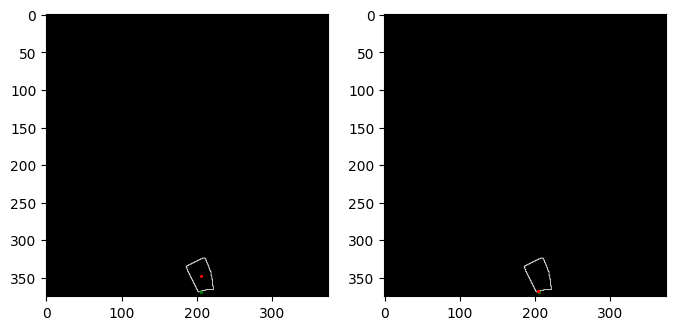

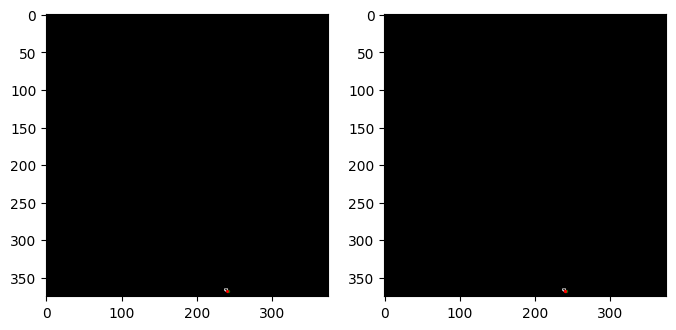

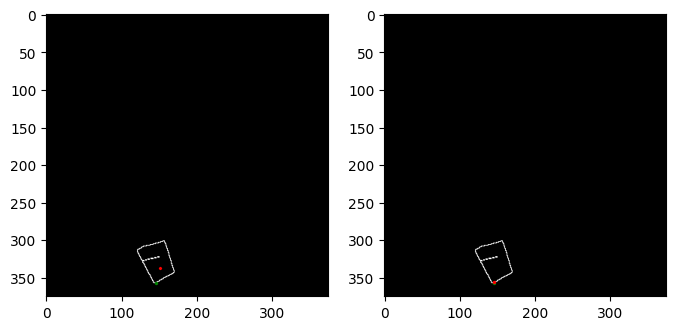

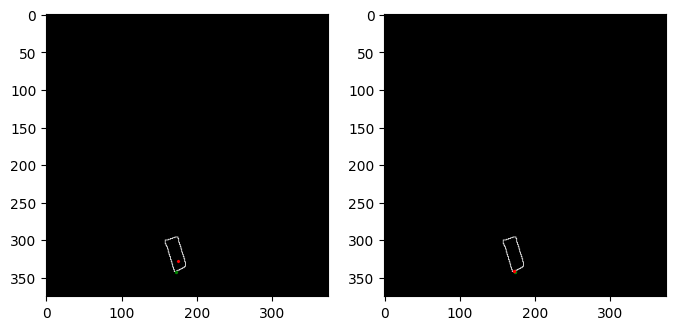

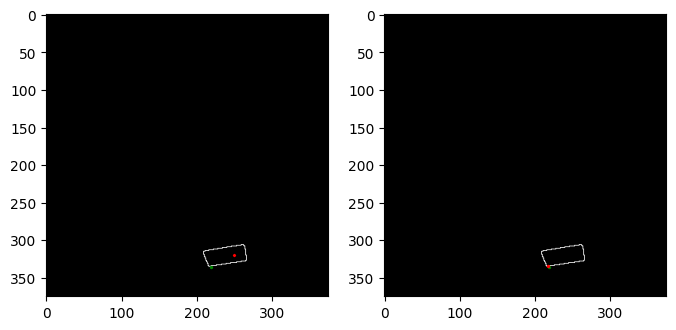

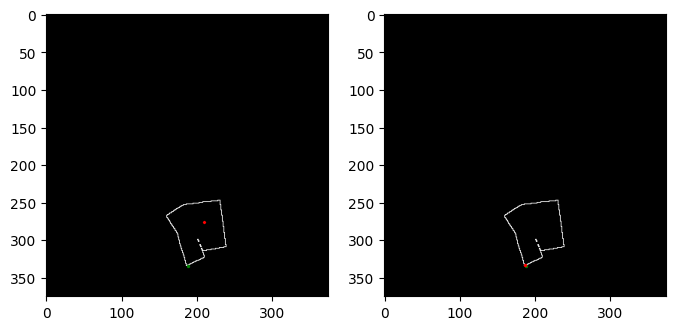

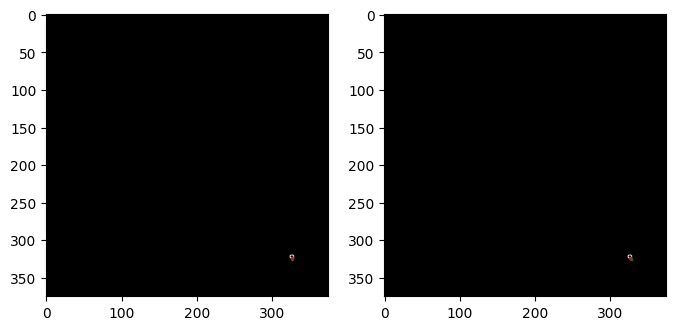

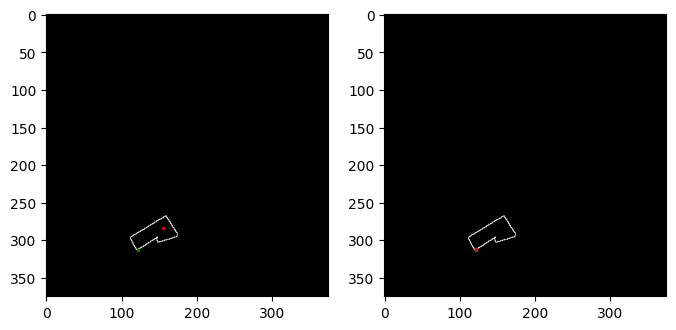

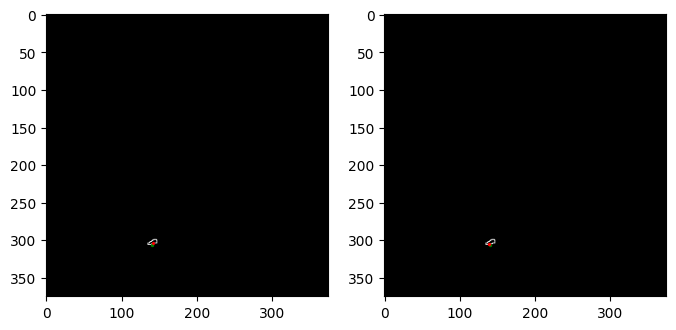

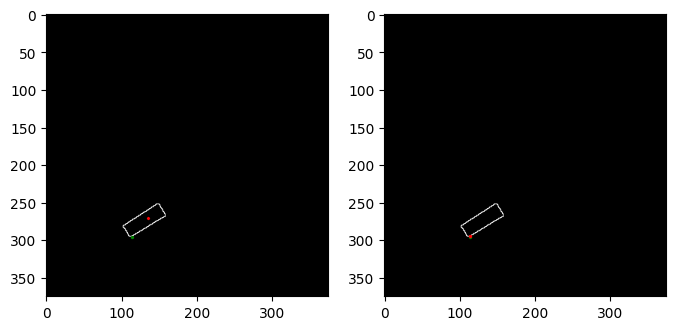

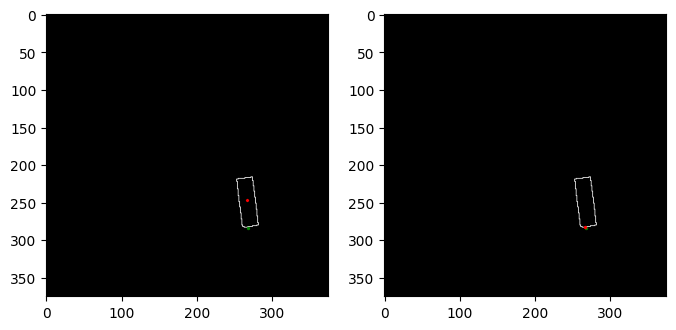

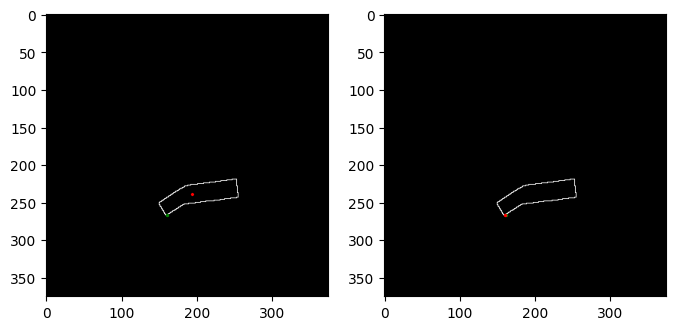

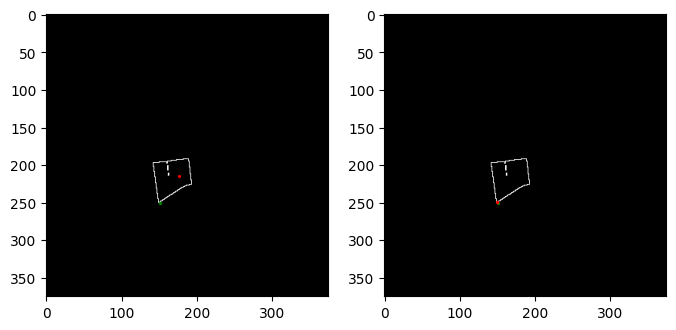

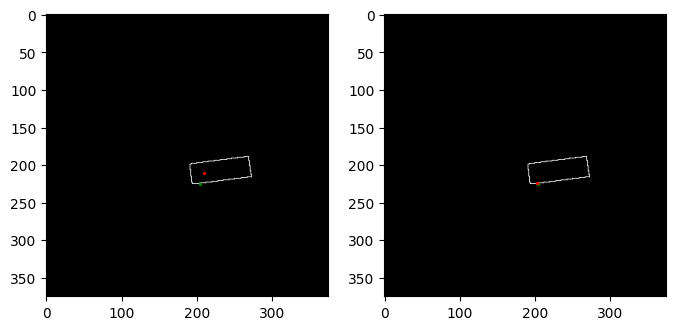

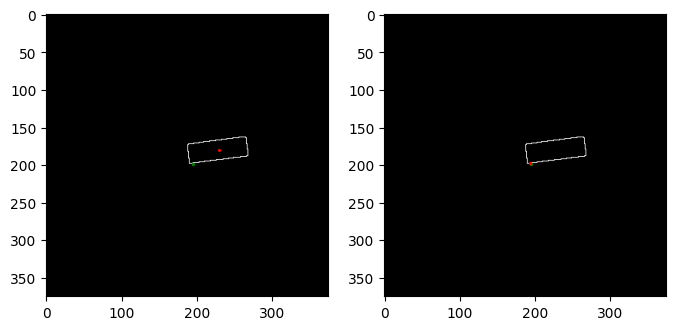

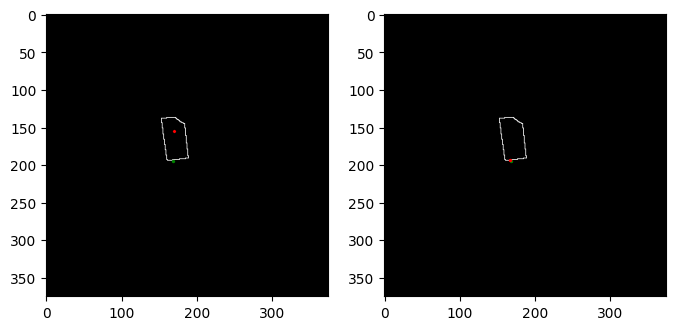

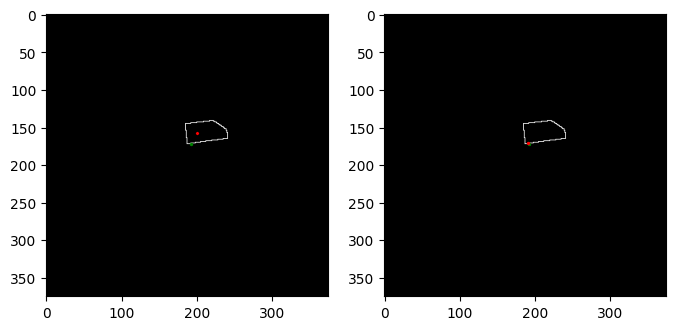

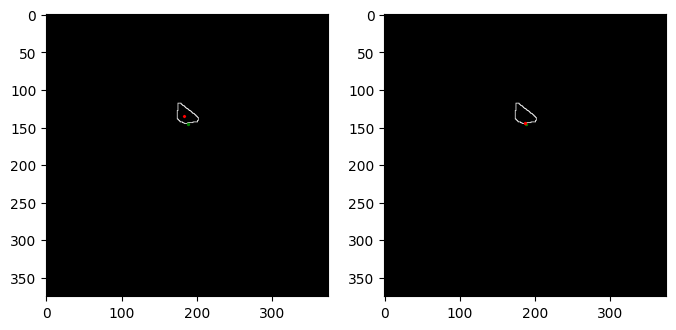

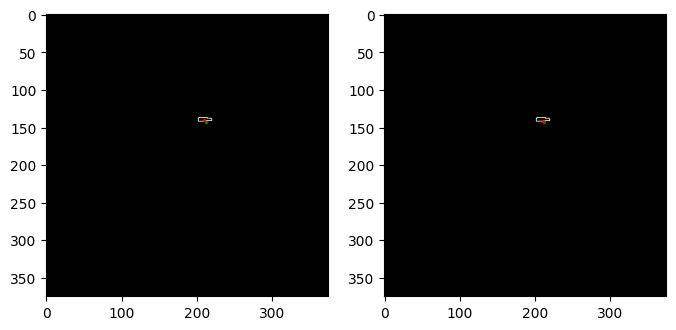

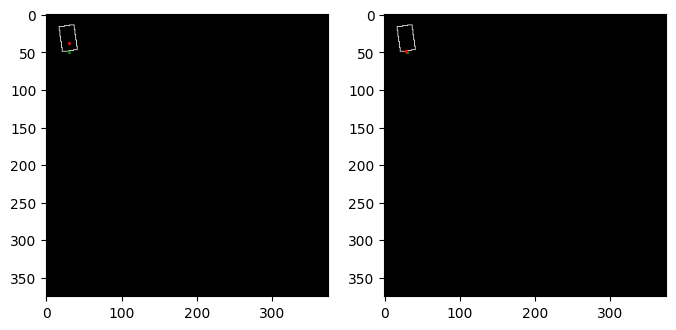

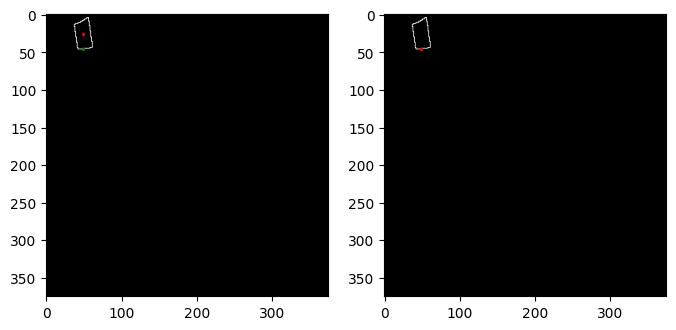

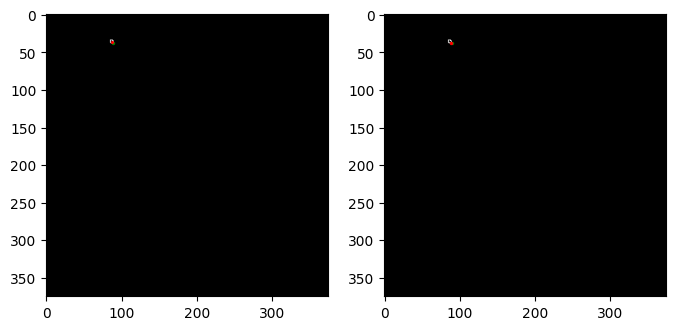

In [62]:
for i, (cycle_dt, cycle_label) in enumerate(zip(cycles_dt.matched_cycles, cycles_label.matched_cycles)):
    cycle_image_dt = np.zeros_like(dt)
    cycle_image_dt[*cycle_dt.T] = 1
    cycle_image_label = np.zeros_like(label)
    cycle_image_label[*cycle_label.T] = 1

    birth_dt = result.input1_matched_birth_coordinates[1][i]
    death_dt = result.input1_matched_death_coordinates[1][i]
    birth_label = result.input2_matched_birth_coordinates[1][i]
    death_label = result.input2_matched_death_coordinates[1][i]

    f, axarr = plt.subplots(1, 2, figsize=(8,8))
    axarr[0].imshow(cycle_image_dt, cmap='grey')
    axarr[0].scatter(birth_dt[1], birth_dt[0], s=2, c='green', marker='o')
    axarr[0].scatter(death_dt[1], death_dt[0], s=2, c='red', marker='x')
    axarr[1].imshow(cycle_image_label, cmap='grey')
    axarr[1].scatter(birth_label[1], birth_label[0], s=2, c='green', marker='o')
    axarr[1].scatter(death_label[1], death_label[0], s=2, c='red', marker='o')
    
    plt.show()

You can also matched the unmatched representative cycles.

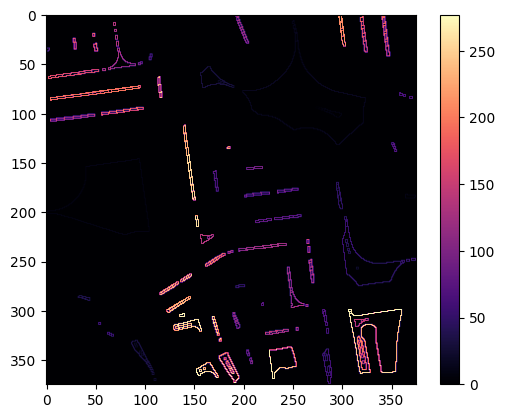

In [63]:
cycles = BM.compute_representative_cycles(input=1, dim=1, unmatched='all')
cycle_image = np.zeros_like(dt)
for i, cycle in enumerate(cycles.unmatched_cycles):
    cycle_image[*cycle.T] = i
    
img = plt.imshow(cycle_image, cmap='magma')
cbar = plt.colorbar(img)
plt.show()

In order to compute the representative cycles of just one image, you can initialize a `BettiMatching`class with both inputs being your image and compute the matched representative cycles.

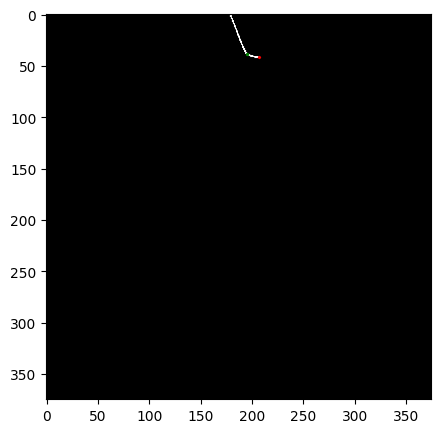

In [105]:
dim = 0
index = 2

BM = bm.BettiMatching(dt, dt)
BM.compute_matching()
result = BM.get_matching()


cycles = BM.compute_representative_cycles(input=1, dim=dim, matched=index)

cycle_image = np.zeros_like(dt)
cycle_image[*cycles.matched_cycles[0].T] = 1
birth = result.input1_matched_birth_coordinates[dim][index]
death = result.input1_matched_death_coordinates[dim][index]

plt.figure(figsize=(5,5))
img = plt.imshow(cycle_image, cmap='grey')
plt.scatter(birth[1], birth[0], s=2, c='green', marker='o')
plt.scatter(death[1], death[0], s=2, c='red', marker='x')
plt.show()